In [100]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms
import scipy.stats as stats

In [101]:
train_other = pd.read_csv("data/other_train.csv")


# Other data

## Identifikovane chyby
**kutosis_oxygen** 
-chybaju niektore hodnoty(5)

**pragnent**
-viacere nazvy pre je typ + prazdne hodnoty

**education-num**
-prazdne hodnoty(18)

**relationship**
-niektore s hodnotou nan

**skewnees_glucose**
-chybaju hodnoty

**mean_glucose**
-chybajuce hodnoty

**std_oxygen**
**capital-gain**
**skewness_oxygen**
**kurtosis_glucose**
**personal_info**
**education**
**fnlwgt**
**class**
**std_glucose**
**income**
**mean_oxygen**
**hours-per-week**
**capital-loss**

In [102]:
train_other.describe()

,Unnamed: 0,kurtosis_oxygen,education-num,skewness_glucose,mean_glucose,std_oxygen,capital-gain,skewness_oxygen,kurtosis_glucose,fnlwgt,class,std_glucose,mean_oxygen,hours-per-week,capital-loss
count,3983.00000,3978.000000,3965.000000,3960.000000,3973.000000,3969.000000,3967.000000,3970.000000,3965.000000,3970.000000,3964.000000,3971.000000,3967.000000,3970.000000,3963.000000
mean,1991.00000,7.414473,10.084489,4.242530,101.248940,31.148558,1042.988908,91.370712,0.950507,192967.197985,0.255298,74.479764,18.470601,40.568766,80.275549
std,1149.93739,4.811907,2.588918,9.706012,33.601519,22.263993,7006.726961,108.475749,1.611069,103285.567216,0.436083,1448.165852,34.808695,12.601133,388.336046
min,0.00000,-2.597872,1.000000,-1.755332,6.187500,7.370432,0.000000,-1.976976,-1.641515,19214.000000,0.000000,-8305.388133,0.213211,1.000000,0.000000
25%,995.50000,3.630716,9.000000,-0.120081,87.742188,15.024700,0.000000,12.858504,0.072144,120960.000000,0.000000,39.502222,2.061873,40.000000,0.000000
50%,1991.00000,7.784802,10.000000,0.374657,110.664062,20.547873,0.000000,68.623477,0.310372,182045.000000,0.000000,45.928079,3.223244,40.000000,0.000000
75%,2986.50000,10.278883,12.000000,2.091543,124.132812,43.253607,0.000000,127.236918,0.775684,241631.000000,1.000000,51.048246,12.610786,45.000000,0.000000
max,3982.00000,34.539844,16.000000,68.101622,189.734375,110.642211,99999.000000,1191.000837,8.069522,889965.000000,1.000000,6649.471314,217.371238,99.000000,3770.000000


In [103]:
train_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Data columns (total 22 columns):
Unnamed: 0          3983 non-null int64
name                3983 non-null object
address             3983 non-null object
kurtosis_oxygen     3978 non-null float64
pregnant            3971 non-null object
education-num       3965 non-null float64
relationship        3970 non-null object
skewness_glucose    3960 non-null float64
mean_glucose        3973 non-null float64
std_oxygen          3969 non-null float64
capital-gain        3967 non-null float64
skewness_oxygen     3970 non-null float64
kurtosis_glucose    3965 non-null float64
personal_info       3971 non-null object
education           3971 non-null object
fnlwgt              3970 non-null float64
class               3964 non-null float64
std_glucose         3971 non-null float64
income              3969 non-null object
mean_oxygen         3967 non-null float64
hours-per-week      3970 non-null float64
capital-loss        

In [104]:
train_other.head()

,Unnamed: 0,name,address,kurtosis_oxygen,pregnant,education-num,relationship,skewness_glucose,mean_glucose,std_oxygen,...,kurtosis_glucose,personal_info,education,fnlwgt,class,std_glucose,income,mean_oxygen,hours-per-week,capital-loss
0,0,Alex Chinzi,"590 Samantha Bridge Apt. 572\r\nNorth Allison,...",8.286599,f,16.0,Husband,0.234418,107.484375,15.072284,...,0.362969,Prof-specialty|United-States\r\r\nMarried-civ-...,Doctorate,320102.0,0.0,44.487706,>50K,2.448161,50.0,0.0
1,1,Scott Bass,"5384 Hurst Groves Apt. 092\r\nFreemanview, SD ...",6.455860,f,13.0,Own-child,0.151130,140.203125,21.925411,...,-0.170101,Prof-specialty|United-States\r\r\nNever-marrie...,Bachelors,148300.0,0.0,44.586531,<=50K,4.445652,15.0,0.0
2,2,Chuck Lao,USS Scott\r\nFPO AE 78885,11.513491,f,9.0,Unmarried,-0.024384,124.054688,11.822427,...,-0.026966,Other-service|Mexico\r\r\nSeparated -- Private...,HS-grad,190885.0,0.0,45.904165,<=50K,1.890468,40.0,0.0
3,3,Floyd Squires,"122 Ryan Ranch Suite 621\r\nPort Douglas, NM 0...",7.641796,f,13.0,Not-in-family,-0.564287,115.046875,22.965651,...,0.269421,Prof-specialty|Canada\r\r\nNever-married -- Pr...,Bachelors,191385.0,0.0,58.140302,<=50K,3.639632,40.0,0.0
4,4,Kenneth Cadet,"30930 Ryan Groves\r\nKatelynside, MS 75220",8.826058,f,9.0,Husband,0.495896,93.335938,13.777158,...,0.537549,Sales|United-States\r\r\nMarried-civ-spouse --...,HS-grad,226875.0,0.0,45.605865,<=50K,2.510870,40.0,0.0


In [105]:
rows=train_other.shape[0]
cols=train_other.shape[1]
print('Pocet stlpcov: ',cols , 'Pocet riadkov: ', rows)


Pocet stlpcov:  22 Pocet riadkov:  3983


#### kurtosis_oxygen

In [106]:
train_other['kurtosis_oxygen'].describe()

count    3978.000000
mean        7.414473
std         4.811907
min        -2.597872
25%         3.630716
50%         7.784802
75%        10.278883
max        34.539844
Name: kurtosis_oxygen, dtype: float64

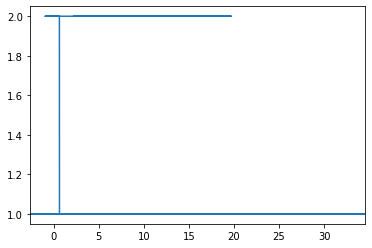

In [107]:
train_other['kurtosis_oxygen'].value_counts().plot(kind = 'line')

#### pregnant 

In [108]:
train_other['pregnant'].describe()


count     3971
unique       6
top          f
freq      3517
Name: pregnant, dtype: object

In [109]:
train_other['pregnant'].unique()


array(['f', 'F', 't', 'FALSE', nan, 'TRUE', 'T'], dtype=object)

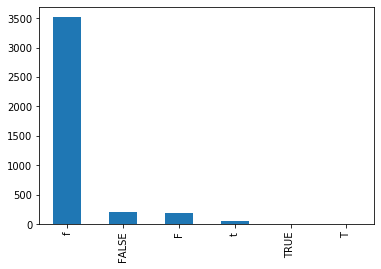

In [110]:
train_other['pregnant'].value_counts().plot(kind = 'bar')

#### education-num

In [111]:
train_other['education-num'].describe()


count    3965.000000
mean       10.084489
std         2.588918
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education-num, dtype: float64

In [112]:
train_other['education-num'].unique()


array([16., 13.,  9., 10., 11.,  6., 12., 14.,  3.,  7., 15.,  5.,  2.,
        8.,  4., nan,  1.])

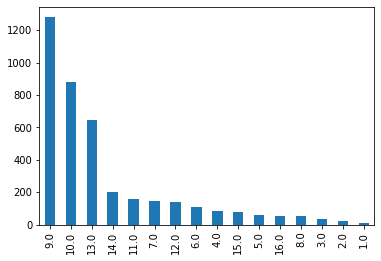

In [113]:
train_other['education-num'].value_counts().plot(kind = 'bar')

#### Relationship

In [114]:
train_other['relationship'].describe()

count         3970
unique           6
top        Husband
freq          1649
Name: relationship, dtype: object

In [115]:
train_other['relationship'].unique()

array([' Husband', ' Own-child', ' Unmarried', ' Not-in-family',
       ' Other-relative', ' Wife', nan], dtype=object)

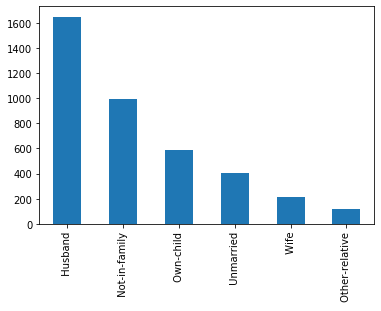

In [116]:
train_other['relationship'].value_counts().plot(kind = 'bar')

#### skewness_glucose

In [117]:
train_other['skewness_glucose'].describe()

count    3960.000000
mean        4.242530
std         9.706012
min        -1.755332
25%        -0.120081
50%         0.374657
75%         2.091543
max        68.101622
Name: skewness_glucose, dtype: float64

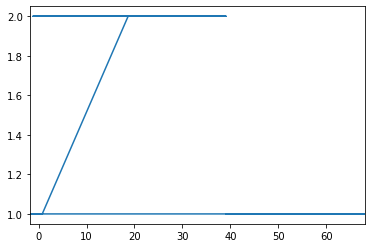

In [118]:
train_other['skewness_glucose'].value_counts().plot(kind = 'line')

#### mean_glucose

In [119]:
train_other['mean_glucose'].describe()

count    3973.000000
mean      101.248940
std        33.601519
min         6.187500
25%        87.742188
50%       110.664062
75%       124.132812
max       189.734375
Name: mean_glucose, dtype: float64

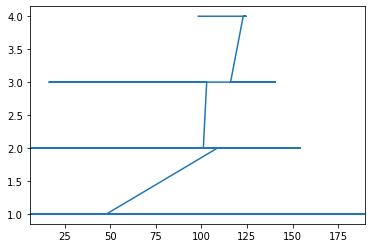

In [120]:
train_other['mean_glucose'].value_counts().plot(kind = 'line')

#### std_oxygen

In [121]:
train_other['std_oxygen'].describe()

count    3969.000000
mean       31.148558
std        22.263993
min         7.370432
25%        15.024700
50%        20.547873
75%        43.253607
max       110.642211
Name: std_oxygen, dtype: float64

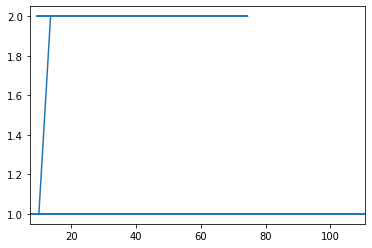

In [122]:
train_other['std_oxygen'].value_counts().plot(kind = 'line')

#### capital-gain

In [123]:
train_other['capital-gain'].describe()

count     3967.000000
mean      1042.988908
std       7006.726961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

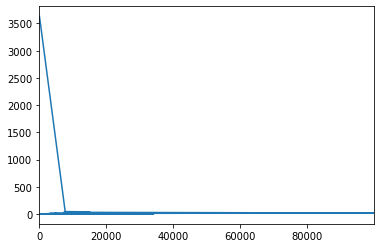

In [124]:
train_other['capital-gain'].value_counts().plot(kind = 'line')

#### skewness_oxygen

In [125]:
train_other['skewness_oxygen'].describe()

count    3970.000000
mean       91.370712
std       108.475749
min        -1.976976
25%        12.858504
50%        68.623477
75%       127.236918
max      1191.000837
Name: skewness_oxygen, dtype: float64

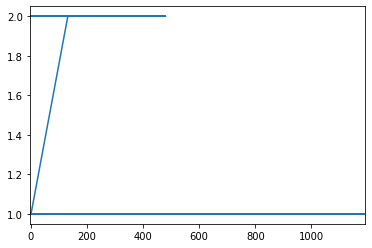

In [126]:
train_other['skewness_oxygen'].value_counts().plot(kind = 'line')

#### kurtosis_glucose

In [127]:
train_other['kurtosis_glucose'].describe()

count    3965.000000
mean        0.950507
std         1.611069
min        -1.641515
25%         0.072144
50%         0.310372
75%         0.775684
max         8.069522
Name: kurtosis_glucose, dtype: float64

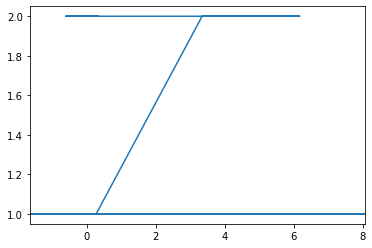

In [128]:
train_other['kurtosis_glucose'].value_counts().plot(kind = 'line')

#### personal_info

In [129]:
train_other['personal_info'].describe()

count                                                  3971
unique                                                  800
top       Craft-repair|United-States\r\r\nMarried-civ-sp...
freq                                                    198
Name: personal_info, dtype: object

In [153]:
train_other['personal_info'].unique()

array(['Prof-specialty|United-States\r\r\nMarried-civ-spouse -- Private|White',
       'Prof-specialty|United-States\r\r\nNever-married -- Private|White',
       'Other-service|Mexico\r\r\nSeparated -- Private|White',
       'Prof-specialty|Canada\r\r\nNever-married -- Private|White',
       'Sales|United-States\r\r\nMarried-civ-spouse -- Private|White',
       'Other-service|United-States\r\r\nNever-married -- Private|White',
       'Adm-clerical|United-States\r\r\nNever-married -- Private|White',
       'Sales|United-States\r\r\nNever-married -- Private|White',
       '?|United-States\r\r\nNever-married -- ?|White',
       'Sales|United-States\r\r\nNever-married -- Private|Black',
       'Tech-support|United-States\r\r\nNever-married -- Private|White',
       'Transport-moving|Iran\r\r\nNever-married -- Private|White',
       'Craft-repair|?\r\r\nNever-married -- Private|Black',
       'Exec_managerial|United-States\r\r\nMarried-civ-spouse -- Private|White',
       'Other-service|Uni

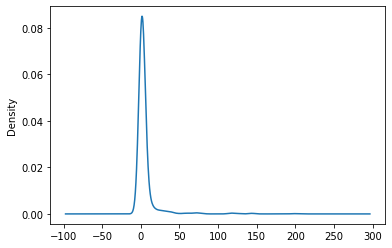

In [155]:
train_other['personal_info'].value_counts().plot(kind = 'kde')

#### education

In [131]:
train_other['education'].describe()

count         3971
unique          16
top        HS-grad
freq          1278
Name: education, dtype: object

In [147]:
train_other['education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad', ' Some-college',
       ' Assoc-voc', ' 10th', ' Assoc-acdm', ' Masters', ' 5th-6th',
       ' 11th', ' Prof-school', ' 9th', ' 1st-4th', ' 12th', ' 7th-8th',
       ' Preschool', nan], dtype=object)

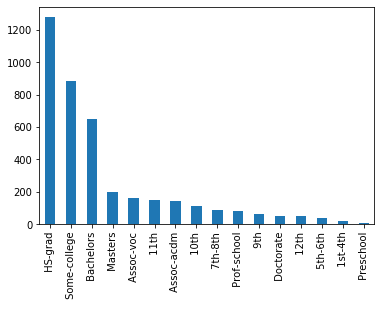

In [148]:
train_other['education'].value_counts().plot(kind = 'bar')

#### fnlwgt

In [133]:
train_other['fnlwgt'].describe()

count      3970.000000
mean     192967.197985
std      103285.567216
min       19214.000000
25%      120960.000000
50%      182045.000000
75%      241631.000000
max      889965.000000
Name: fnlwgt, dtype: float64

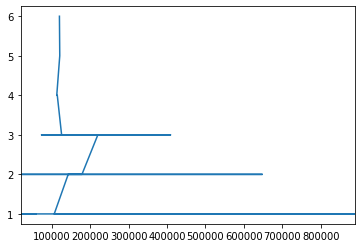

In [134]:
train_other['fnlwgt'].value_counts().plot(kind = 'line')

#### class

In [135]:
train_other['class'].describe()

count    3964.000000
mean        0.255298
std         0.436083
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: class, dtype: float64

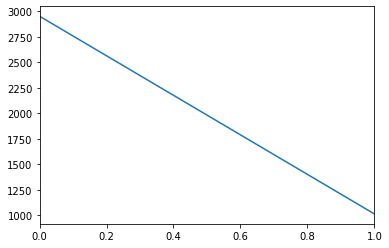

In [136]:
train_other['class'].value_counts().plot(kind = 'line')

#### std_glucose

In [137]:
train_other['std_glucose'].describe()

count    3971.000000
mean       74.479764
std      1448.165852
min     -8305.388133
25%        39.502222
50%        45.928079
75%        51.048246
max      6649.471314
Name: std_glucose, dtype: float64

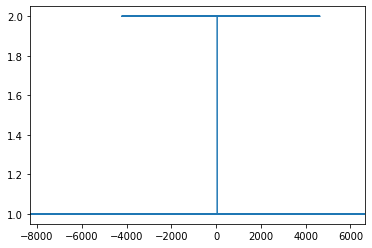

In [138]:
train_other['std_glucose'].value_counts().plot(kind = 'line')

#### income

In [139]:
train_other['income'].describe()

count       3969
unique         2
top        <=50K
freq        2988
Name: income, dtype: object

In [149]:
train_other['income'].unique()

array([' >50K', ' <=50K', nan], dtype=object)

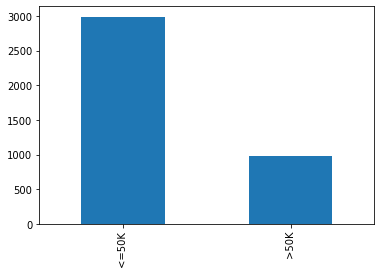

In [150]:
train_other['income'].value_counts().plot(kind = 'bar')

#### mean_oxygen

In [141]:
train_other['mean_oxygen'].describe()

count    3967.000000
mean       18.470601
std        34.808695
min         0.213211
25%         2.061873
50%         3.223244
75%        12.610786
max       217.371238
Name: mean_oxygen, dtype: float64

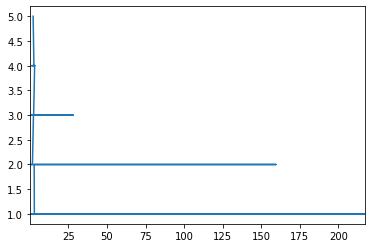

In [142]:
train_other['mean_oxygen'].value_counts().plot(kind = 'line')

#### hours-per-week

In [143]:
train_other['hours-per-week'].describe()

count    3970.000000
mean       40.568766
std        12.601133
min         1.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64

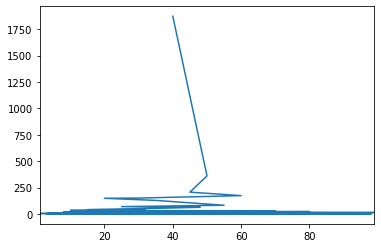

In [144]:
train_other['hours-per-week'].value_counts().plot(kind = 'line')

#### capital-loss

In [145]:
train_other['capital-loss'].describe()

count    3963.000000
mean       80.275549
std       388.336046
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      3770.000000
Name: capital-loss, dtype: float64

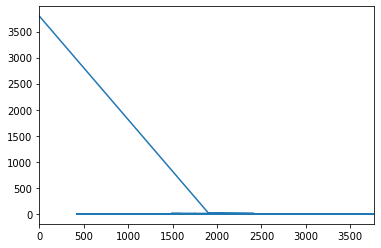

In [146]:
train_other['capital-loss'].value_counts().plot(kind = 'line')

